## A study was undertaken to compare the mean time spent on cell phones by male and female college students per week. Fifty male and 50 female students were selected from Midwestern University and the number of hours per week spent talking on their cell phones determined. The results in hours are shown in Table 10.6. It is desired to test $H_0$: $μ_1=μ_2$ versus $H_1$: $μ_1≠μ_2$ based on these samples.

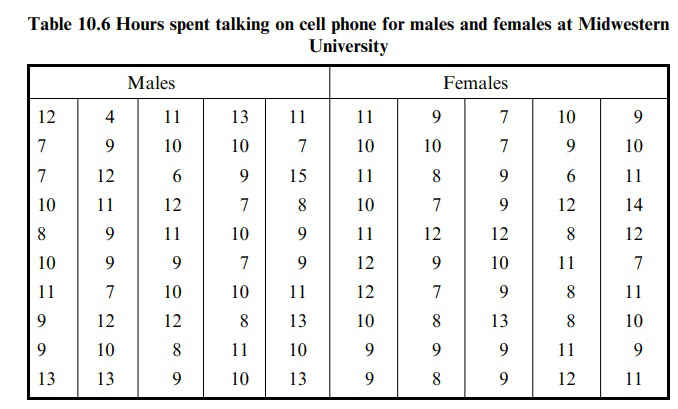

In [61]:
from IPython.display import Image

Image(filename='/kaggle/input/table/other/default/1/Table.png')

In [62]:
import pandas as pd

samples = {
    'Male': [12, 7, 7, 10, 8, 10, 11, 9, 9, 13, 4, 9, 12, 11, 9, 9, 7,
             12, 10, 13, 11, 10, 6, 12, 11, 9, 10, 12, 8, 9, 13, 10, 9,
             7, 10, 7, 10, 8, 11, 10, 11, 7, 15, 8, 9, 9, 11, 13, 10, 13],
    'Female': [11, 10, 11, 10, 11, 12, 12, 10, 9, 9, 9, 10, 8, 7, 12, 9,
               7, 8, 9, 8, 7, 7, 9, 9, 12, 10, 9, 13, 9, 9, 10, 9, 6, 12,
               8, 11, 8, 8, 11, 12, 9, 10, 11, 14, 12, 7, 11, 10, 9, 11]
}

df = pd.DataFrame(samples)

### 1. Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.

**Hypothesis Test:** Independent Two-Sample t-Test

**Procedure:**
1. **Hypotheses**
    * Null Hypothesis ($H_0$): There is no difference between the means of the two groups ($H_0$: $μ_1=μ_2$)
    * Alternative Hypothesis ($H_1$): There is a difference between the means of the two groups ($H_1$: $μ_1 ≠ μ_2$)
2. **Check Assumptions**
    * Check if the two groups are independent
    * Check if the data in each group is normally distributed
    * Check if the variances of the two groups are equal.
3. **Calculate the t-Test Statistic**
    * Formula
    $$t=\frac{\bar{X}_1-\bar{X}_2}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$
where 
    * $\bar{X}_1$ and $\bar{X}_2$ are the sample means,
    * $s_p$ is the pooled standard deviation:    
    $$ s_p=\sqrt{\frac{(n_1-1)s^2_1+(n_2-1)s^2_2}{n_1+n_2-2}} $$
    * $s^2_1$ and $s^2_2$ are the sample variances,
    * $n_1$ and $n_2$ are the sample sizes.
4. **Determine the Degrees of Freedom**
    * Formula:
    $$df=n_1+n_2-2$$
5. **Find the Critical Value or p-value**
    * Use a t-distribution table to find the critical t-value for your chosen significance level (usually α = 0.05) and degrees of freedom. Alternatively, calculate the p-value.
6. **Make a Decision**
    * If the absolute value of the calculated t-statistic is greater than the critical value, or if the p-value is less than α, then the null hypothesis is rejected.

**Rationale:**
1. **Purpose.** The researchers aim to compare the means of two independent groups. Therefore, we will use a t-test, specifically the Independent Two-Sample t-Test.
2. **Normality.** The sample size for each group is 50, which is reasonably large (generally n > 30). Hence, by the Central Limit Theorem, we can assume that our sample sizes are normally distributed.
3. **Equality of Variances.**
    * Hypotheses:
        * Null Hypothesis ($H_0$): There is no difference between the variances of the two groups.
        * Alternative Hypothesis ($H_1$): There is a difference between the variances of the two groups.

**Testing the Hypotheses using Levene's Test**

In [63]:
import numpy as np
from scipy import stats

# Data
data = [df['Male'], df['Female']]

# Perform Levene's Test
statistic, p_value = stats.levene(*data)

# Output the results
print('Levene\'s test statistic:', statistic)
print('p-value:', p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: variances are not equal.")
else:
    print("Fail to reject the null hypothesis – variances are equal.")
    print("Hence, the Independent Two-Sample t-Test can be used since the variances are equal.")

Levene's test statistic: 0.6943460393935098
p-value: 0.4067163398636344
Fail to reject the null hypothesis – variances are equal.
Hence, the Independent Two-Sample t-Test can be used since the variances are equal.


### 2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?

In [64]:
# Calculate means and standard deviations
mean1 = np.mean(df['Male'])
mean2 = np.mean(df['Female'])
std1 = np.std(df['Male'], ddof=1) 
std2 = np.std(df['Female'], ddof=1)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(df['Male'], df['Female'])

print("Mean of Male Group:", mean1)
print("Mean of Female Group:", mean2)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Mean of Male Group: 9.82
Mean of Female Group: 9.7
t-statistic: 0.30394907866566184
p-value: 0.7618111039906375
Fail to reject the null hypothesis: There is no significant difference between the groups.


**Recommendation:**
Since the population size was never stated, I recommend the researchers to increase their sample size as it can provide more reliable results and greater statistical power. 

### 3. Provide descriptive statistical summaries of the data for each gender category.

In [65]:
import scipy.stats as stats

# Descriptive statistics calculations
descrip_stats_df = df['Male'].describe(percentiles=[.25, .5, .75, .9, .95])

# Additional statistics
mode_result = stats.mode(df['Male'], keepdims=False)

# Check if the result is scalar or array
if isinstance(mode_result.mode, np.ndarray) and len(mode_result.mode) > 0:
    mode_val = mode_result.mode[0]
else:
    mode_val = mode_result.mode  # Assign the scalar value directly

n = len(df['Male'])
variance = np.var(df['Male'], ddof=1)  # Sample variance
skewness = stats.skew(df['Male'])
kurtosis = stats.kurtosis(df['Male'])

# Round all computed statistics to 3 decimal places
mode_val = round(mode_val, 3)
median = round(df['Male'].median(), 3)
male_mean = round(df['Male'].mean(), 3)
male_std_dev = round(df['Male'].std(), 3)
variance = round(variance, 3)
skewness = round(skewness, 3)
std_error_skewness = round(np.sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3))), 3)
kurtosis = round(kurtosis, 3)
std_error_kurtosis = round(np.sqrt((24 * n * (n - 1)**2) / ((n - 3) * (n - 2) * (n + 3) * (n + 5))), 3)
minimum = round(df['Male'].min(), 3)
maximum = round(df['Male'].max(), 3)
percentile_25 = round(descrip_stats_df['25%'], 3)
percentile_50 = round(descrip_stats_df['50%'], 3)
percentile_75 = round(descrip_stats_df['75%'], 3)
percentile_90 = round(descrip_stats_df['90%'], 3)
percentile_95 = round(descrip_stats_df['95%'], 3)

# Creating the table
descrip_stats_table = pd.DataFrame({
    "Score": {
        "Valid": df['Male'].count(),
        "Mode": mode_val,
        "Median": median,
        "Mean": male_mean,
        "Std. Deviation": male_std_dev,
        "Variance": variance,
        "Skewness": skewness,
        "Std. Error of Skewness": std_error_skewness,
        "Kurtosis": kurtosis,
        "Std. Error of Kurtosis": std_error_kurtosis,
        "Minimum": minimum,
        "Maximum": maximum,
        "25th percentile": percentile_25,
        "50th percentile": percentile_50,
        "75th percentile": percentile_75,
        "90th percentile": percentile_90,
        "95th percentile": percentile_95
    }
})
print('Descriptive Statistical Summary for Male Group')
descrip_stats_table

Descriptive Statistical Summary for Male Group


,Score
Valid,50.000
Mode,9.000
Median,10.000
Mean,9.820
Std. Deviation,2.154
Variance,4.640
Skewness,-0.111
Std. Error of Skewness,0.337
Kurtosis,0.042
Std. Error of Kurtosis,0.662


In [66]:
import scipy.stats as stats

# Descriptive statistics calculations
descrip_stats_df = df['Female'].describe(percentiles=[.25, .5, .75, .9, .95])

# Additional statistics
mode_result = stats.mode(df['Female'], keepdims=False)

# Check if the result is scalar or array
if isinstance(mode_result.mode, np.ndarray) and len(mode_result.mode) > 0:
    mode_val = mode_result.mode[0]
else:
    mode_val = mode_result.mode  # Assign the scalar value directly

n = len(df['Female'])
variance = np.var(df['Female'], ddof=1)  # Sample variance
skewness = stats.skew(df['Female'])
kurtosis = stats.kurtosis(df['Female'])

# Round all computed statistics to 3 decimal places
mode_val = round(mode_val, 3)
median = round(df['Female'].median(), 3)
fem_mean = round(df['Female'].mean(), 3)
fem_std_dev = round(df['Female'].std(), 3)
variance = round(variance, 3)
skewness = round(skewness, 3)
std_error_skewness = round(np.sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3))), 3)
kurtosis = round(kurtosis, 3)
std_error_kurtosis = round(np.sqrt((24 * n * (n - 1)**2) / ((n - 3) * (n - 2) * (n + 3) * (n + 5))), 3)
minimum = round(df['Female'].min(), 3)
maximum = round(df['Female'].max(), 3)
percentile_25 = round(descrip_stats_df['25%'], 3)
percentile_50 = round(descrip_stats_df['50%'], 3)
percentile_75 = round(descrip_stats_df['75%'], 3)
percentile_90 = round(descrip_stats_df['90%'], 3)
percentile_95 = round(descrip_stats_df['95%'], 3)

# Creating the table
descrip_stats_table = pd.DataFrame({
    "Score": {
        "Valid": df['Female'].count(),
        "Mode": mode_val,
        "Median": median,
        "Mean": fem_mean,
        "Std. Deviation": fem_std_dev,
        "Variance": variance,
        "Skewness": skewness,
        "Std. Error of Skewness": std_error_skewness,
        "Kurtosis": kurtosis,
        "Std. Error of Kurtosis": std_error_kurtosis,
        "Minimum": minimum,
        "Maximum": maximum,
        "25th percentile": percentile_25,
        "50th percentile": percentile_50,
        "75th percentile": percentile_75,
        "90th percentile": percentile_90,
        "95th percentile": percentile_95
    }
})
print('Descriptive Statistical Summary for Female Group')
descrip_stats_table

Descriptive Statistical Summary for Female Group


,Score
Valid,50.000
Mode,9.000
Median,9.500
Mean,9.700
Std. Deviation,1.776
Variance,3.153
Skewness,0.130
Std. Error of Skewness,0.337
Kurtosis,-0.516
Std. Error of Kurtosis,0.662


### 4. What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence interval for the difference between the means of the two populations?

#### **95% confidence interval for the population mean of Male Group**

In [67]:
male_sem = round(male_std_dev/np.sqrt(len(df['Male'])), 2)

# Critical Value
crit_value = 2.009

# Confidence Interval
lowest_male_ci = round(male_mean - (crit_value * male_sem), 3)
highest_male_ci = round(male_mean + (crit_value * male_sem), 3)

print(f'95% Confidence Interval for Male Students: ({lowest_male_ci}, {highest_male_ci})')

95% Confidence Interval for Male Students: (9.217, 10.423)


#### **95% confidence interval for the population mean of Female Group**

In [68]:
fem_sem = round(fem_std_dev/np.sqrt(len(df['Female'])), 2)

# Critical Value
crit_value = 2.009

# Confidence Interval
lowest_fem_ci = round(fem_mean - (crit_value * fem_sem), 3)
highest_fem_ci = round(fem_mean + (crit_value * fem_sem), 3)

print(f'95% Confidence Interval for Female Students: ({lowest_fem_ci}, {highest_fem_ci})')

95% Confidence Interval for Female Students: (9.198, 10.202)


#### **95% Confidence Interval for the Difference Between Means**

In [69]:
mean_diff = male_mean - fem_mean
se_diff = np.sqrt(((male_std_dev**2)/len(df['Male'])) + ((fem_std_dev**2)/len(df['Female'])))

# Confidence Interval for the Difference
lowest_ci_diff = round(mean_diff - (crit_value * se_diff), 4)
highest_ci_diff = round(mean_diff + (crit_value * se_diff), 4)

print(f'95% Confidence Interval for the Difference Between Means: ({lowest_ci_diff}, {highest_ci_diff})')

95% Confidence Interval for the Difference Between Means: (-0.6732, 0.9132)


### 5. Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.

#### **Answer:** Yes, we need larger samples size and more testing with the time spent on cell phones.
#### **Reasons:**
1. **Better Accuracy**
    * When you have a bigger group of people in your study, it helps you get a more accurate idea of what’s really going on in the whole population. This makes the confidence intervals narrower, on which confidence intervals show how certain you can be about the average. In this study, since the confidence intervals for male and female students overlap, it might mean that the sample size isn’t big enough to find any real differences if there are any.
2. **Fewer Errors**
    * Larger samples tends to reduce the effect of unusual data points, which what makes results more reliable. This means that the sample is a better reflection of the whole population, resulting to less mistakes in our findings.
3. **More Power in Tests**
    * Having a larger sample size positively affect the statistical power of our tests. This means that we can have a better chance of correctly finding a difference, if there actually is one, like if male and female students really do spend different amounts of time on their phones.

### 6. Make a report including the testing of the assumptions for two independent samples t-test.

#### **Report: Comparison of Mean Time Spent on Cell Phones by Male and Female College Students**
#### Introduction
A study was conducted to compare the mean time spent on cell phones by male and female college students per week. Fifty male and fifty female students from Midwestern University were selected, and the number of hours per week spent talking on their cell phones was recorded. The hypotheses tested were:
* Null Hypothesis ($H_0$): ($\mu_1 = \mu_2$) (The mean time spent on cell phones by male and female students is equal)
* Alternative Hypothesis ($H_1$): ($\mu_1 \neq \mu_2$) (The mean time spent on cell phones by male and female students is not equal)
#### Data Summary
* **Male Students:** [12, 7, 7, 10, 8, 10, 11, 9, 9, 13, 4, 9, 12, 11, 9, 9, 7, 12, 10, 13, 11, 10, 6, 12, 11, 9, 10, 12, 8, 9, 13, 10, 9, 7, 10, 7, 10, 8, 11, 10, 11, 7, 15, 8, 9, 9, 11, 13, 10, 13]
* **Female Students:** [11, 10, 11, 10, 11, 12, 12, 10, 9, 9, 9, 10, 8, 7, 12, 9, 7, 8, 9, 8, 7, 7, 9, 9, 12, 10, 9, 13, 9, 9, 10, 9, 6, 12, 8, 11, 8, 8, 11, 12, 9, 10, 11, 14, 12, 7, 11, 10, 9, 11]
#### Testing Assumptions for Two Independent Samples t-Test
1. **Independence of Observations:**
    * Each student’s time spent on their cell phone is independent of the others. The samples are randomly selected from the population of male and female students.
2. **Normality:**
    * The distribution of the sample means should be approximately normal. This will be checked using the Shapiro-Wilk test
        * **Male Students:** (W = 0.9747, p = 0.3540)
        * **Female Students:** (W = 0.9639, p = 0.1292)
    * Since the p-values are greater than 0.05, we fail to reject the null hypothesis that the data is normally distributed.
4. **Homogeneity of Variances:**
    * The variances of the two populations should be equal. This will be tested using Levene’s test.
        * (F = 0.6943, p = 0.4067 )
    * Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the variances are equal.
#### Confidence Intervals
* 95% Confidence Interval for Male Students: (9.217, 10.423)
* 95% Confidence Interval for Female Students: (9.198, 10.202)
* 95% Confidence Interval for the Difference Between Means: (-0.6732, 0.9132)
#### Conclusion
The confidence intervals for the means of male and female students overlap, and the confidence interval for the difference between the means includes zero. This suggests that there is no significant difference in the mean time spent on cell phones per week between male and female students at the 95% confidence level.
#### Recommendations
* Larger Sample Sizes: Increasing the sample size could provide more precise estimates and increase the power of the test.
* Further Testing: Additional studies could help validate these findings and explore other factors that might influence cell phone usage.